In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

In [3]:
df = pd.read_csv("Desktop/Data for prectice /Ecommerce_Delivery_Analytics_New.csv")

In [4]:
df.head(5).style.background_gradient(cmap='PuBu')

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [8]:
df.tail().style.background_gradient(cmap='PuBu')

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No
99999,ORD100000,CUST3748,JioMart,41:29.5,34,Fruits & Vegetables,453,Packaging could be better.,3,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [30]:
df.describe().style.background_gradient(cmap='PuBu')

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,100000.000000,100000.000000,100000.000000
mean,29.536140,590.994400,3.240790
std,9.958933,417.409058,1.575962
min,5.000000,50.000000,1.000000
25%,23.000000,283.000000,2.000000
50%,30.000000,481.000000,3.000000
75%,36.000000,770.000000,5.000000
max,76.000000,2000.000000,5.000000


In [14]:
df.shape

(100000, 11)

In [16]:
df.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [18]:
 #Convert order time into a proper datetime format (assuming missing date)
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'],format = "%M:%S.%f")

In [20]:
# convert order to which order done in which month
df['order_months'] = pd.to_datetime(df['Order Date & Time']).dt.month

In [22]:
# convert order to which order done in which day 
# day_name shows oders done in which week
df['order_days'] = pd.to_datetime(df['Order Date & Time']).dt.day
df['order_days_name'] = df['Order Date & Time'].dt.day_name()

In [24]:
# convert order to which order done in which hour
df['order_hour'] = pd.to_datetime(df['Order Date & Time']).dt.hour

In [26]:
# extract iso calender 
df['order_per_week'] = df['Order Date & Time'].dt.isocalendar().week

In [28]:
#shows which platform has the highest count 
df['Platform'].value_counts().reset_index().style.background_gradient(cmap='PuBu')

,Platform,count
0,Swiggy Instamart,33449
1,Blinkit,33424
2,JioMart,33127


In [30]:
df.describe().style.background_gradient(cmap='PuBu')

,Order Date & Time,Delivery Time (Minutes),Order Value (INR),Service Rating,order_months,order_days,order_hour,order_per_week
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1900-01-01 00:30:02.460999424,29.536140,590.994400,3.240790,1.000000,1.000000,0.000000,1.000000
min,1900-01-01 00:00:29.500000,5.000000,50.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1900-01-01 00:15:29.500000,23.000000,283.000000,2.000000,1.000000,1.000000,0.000000,1.000000
50%,1900-01-01 00:30:29.500000,30.000000,481.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,1900-01-01 00:45:29.500000,36.000000,770.000000,5.000000,1.000000,1.000000,0.000000,1.000000
max,1900-01-01 00:59:29.500000,76.000000,2000.000000,5.000000,1.000000,1.000000,0.000000,1.000000
std,nan,9.958933,417.409058,1.575962,0.000000,0.000000,0.000000,0.000000


In [32]:
# shows if there is any null values
df.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
order_months               0
order_days                 0
order_days_name            0
order_hour                 0
order_per_week             0
dtype: int64

In [34]:
# shows relation between Platform ,  customer feedback and service rating
a = df.groupby(['Customer Feedback','Platform','Service Rating']).size().reset_index(name='Count').sort_values(by='Service Rating', ascending = False).head(10).style.background_gradient(cmap='PuBu')
a

,Customer Feedback,Platform,Service Rating,Count
9,"Fast delivery, great service!",Blinkit,5,2558
8,Excellent experience!,Swiggy Instamart,5,2606
27,Quick and reliable!,Blinkit,5,2569
33,Very satisfied with the service.,Blinkit,5,2568
34,Very satisfied with the service.,JioMart,5,2546
11,"Fast delivery, great service!",Swiggy Instamart,5,2566
10,"Fast delivery, great service!",JioMart,5,2591
29,Quick and reliable!,Swiggy Instamart,5,2566
28,Quick and reliable!,JioMart,5,2523
7,Excellent experience!,JioMart,5,2608


<Axes: ylabel='Customer Feedback,Platform,Service Rating'>

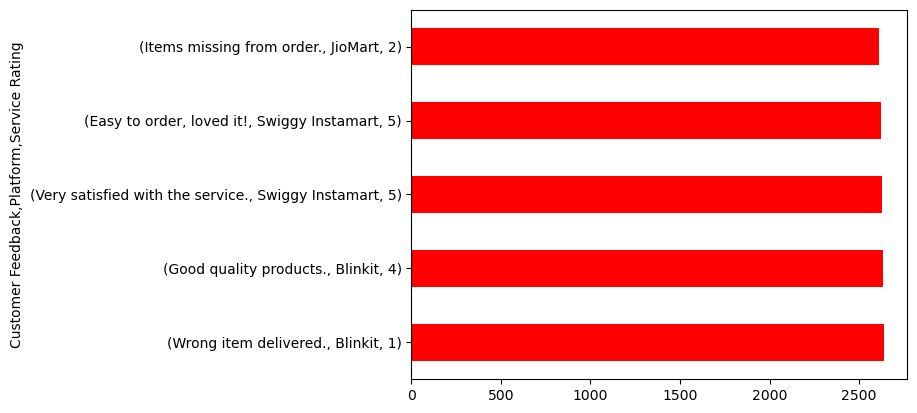

In [44]:
# shows customer feedback in barplot
a.plot(kind = 'barh' , color = 'red')

In [38]:
# shows relation between Platform ,  customer feedback and service rating top 10
a = df.groupby(['Customer Feedback','Platform','Service Rating']).size().sort_values(ascending = False).head(5)
a

Customer Feedback                 Platform          Service Rating
Wrong item delivered.             Blinkit           1                 2638
Good quality products.            Blinkit           4                 2634
Very satisfied with the service.  Swiggy Instamart  5                 2626
Easy to order, loved it!          Swiggy Instamart  5                 2622
Items missing from order.         JioMart           2                 2611
dtype: int64

<Axes: xlabel='Customer Feedback,Platform,Service Rating'>

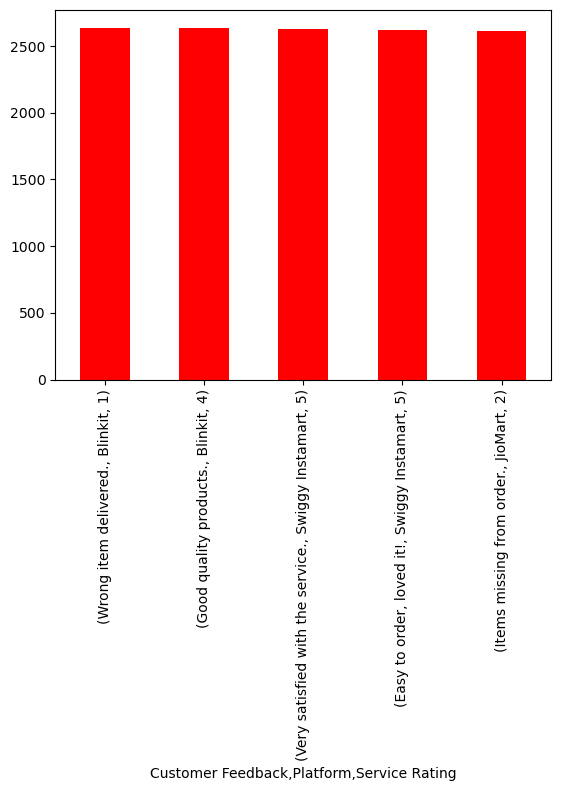

In [40]:
# shows customer feedback which are top 10
a.plot(kind = 'bar' , color = 'red')  # seabor 

In [42]:
# shows relation between platform , delivery time , customer feedback and service rating
b = df.groupby(['Platform' , 'Delivery Time (Minutes)','Customer Feedback' , 'Service Rating' , 'Delivery Delay']).size().reset_index(name='count').sort_values(by = 'count',ascending = False)
b

,Platform,Delivery Time (Minutes),Customer Feedback,Service Rating,Delivery Delay,count
334,Blinkit,30,Quick and reliable!,5,No,140
333,Blinkit,30,Packaging could be better.,3,No,126
337,Blinkit,30,Wrong item delivered.,1,No,125
1823,Swiggy Instamart,30,"Easy to order, loved it!",5,No,124
1082,JioMart,30,Very satisfied with the service.,5,No,123
...,...,...,...,...,...,...
730,Blinkit,63,"Horrible experience, never ordering again.",1,Yes,1
729,Blinkit,63,"Easy to order, loved it!",5,Yes,1
728,Blinkit,62,Very satisfied with the service.,5,Yes,1
727,Blinkit,62,"Very late delivery, not happy.",2,Yes,1


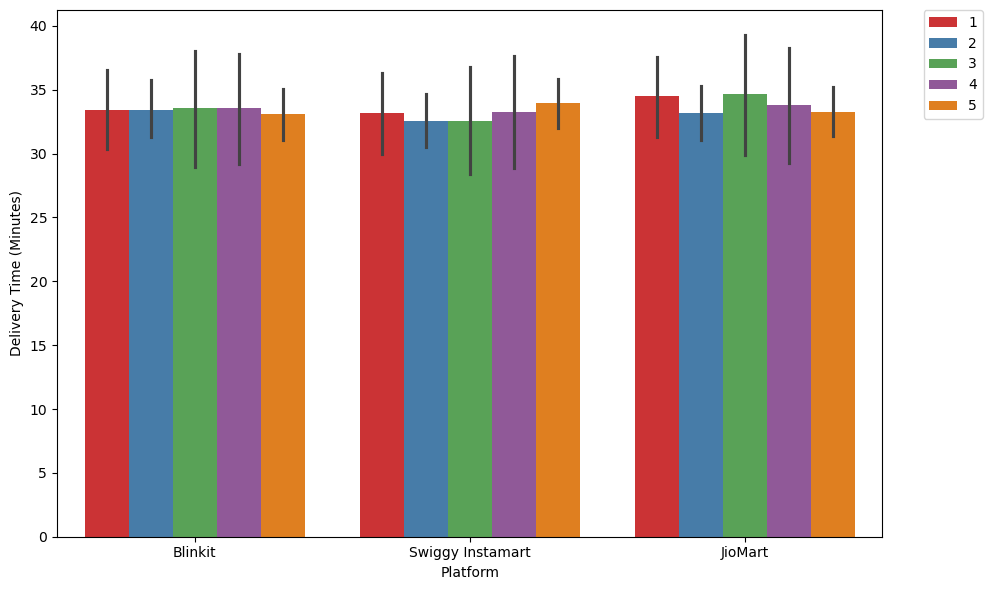

In [67]:
# shows barplot between the given data count means how many times customer feedback was reliable according to service rating and delivery delay
# some delivery time is more than 40 so it shows the average of it 
plt.figure(figsize=(10,6))
sns.barplot (data = b , x = 'Platform' , y = 'Delivery Time (Minutes)' , hue = 'Service Rating', palette = 'Set1')
plt.legend(loc ='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()

In [69]:
c = df.groupby(['Platform' , 'Product Category' , 'Order Value (INR)']).size().sort_values(ascending = False).reset_index(name='Count')
c

,Platform,Product Category,Order Value (INR),Count
0,JioMart,Snacks,237,24
1,Blinkit,Snacks,415,24
2,JioMart,Snacks,290,23
3,Blinkit,Snacks,167,23
4,Blinkit,Snacks,439,23
...,...,...,...,...
17324,Swiggy Instamart,Personal Care,999,1
17325,Blinkit,Personal Care,1761,1
17326,Blinkit,Personal Care,1758,1
17327,Blinkit,Personal Care,1755,1


<Axes: xlabel='Platform', ylabel='Order Value (INR)'>

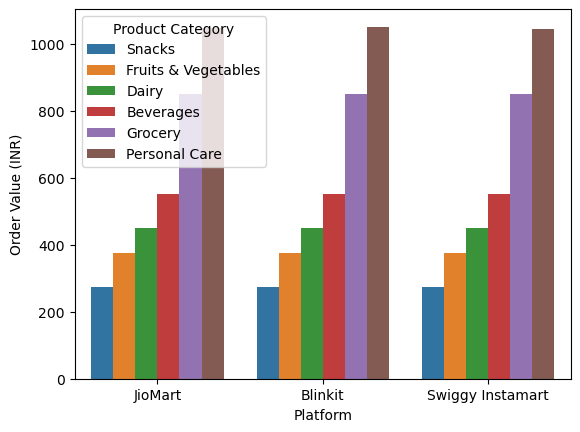

In [63]:
# shows the data in barplot in which which product category is ordered from which platform and how much was the Order Value
sns.barplot(data = c , x = 'Platform' , y = 'Order Value (INR)', hue  = 'Product Category',errorbar = None)

In [122]:
d = df.groupby(['Product Category','Delivery Delay','Refund Requested'])['Delivery Time (Minutes)'].mean().sort_values(ascending = False).reset_index()
d # How to find more correclation between Product,Delivery and Refund group by platform

,Product Category,Delivery Delay,Refund Requested,Delivery Time (Minutes)
0,Beverages,Yes,No,45.818031
1,Fruits & Vegetables,Yes,Yes,45.815764
2,Dairy,Yes,No,45.703763
3,Fruits & Vegetables,Yes,No,45.691188
4,Snacks,Yes,Yes,45.533582
5,Snacks,Yes,No,45.528870
6,Personal Care,Yes,Yes,45.503408
7,Grocery,Yes,Yes,45.502841
8,Grocery,Yes,No,45.475736
9,Dairy,Yes,Yes,45.382879


<Axes: xlabel='Delivery Delay', ylabel='Product Category'>

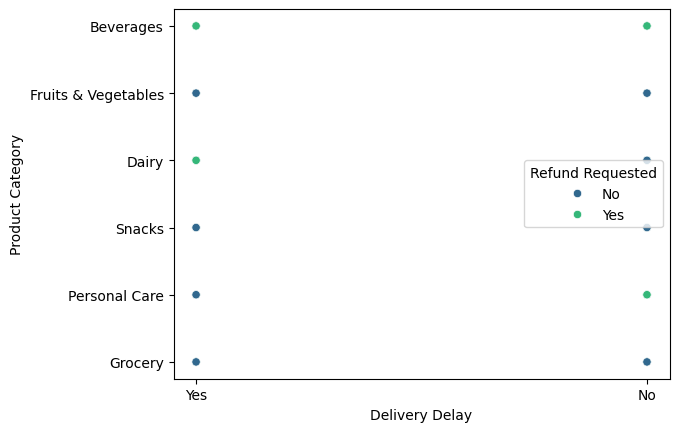

In [154]:
# refund requested if theres a delay in delivery
sns.scatterplot(data=d, x='Delivery Delay', y='Product Category', hue='Refund Requested',  palette="viridis")

In [73]:
# total revenue generated by platform where total orders values came from product category
e = df.groupby(['Platform','Product Category',])['Order Value (INR)'].sum().sort_values(ascending=False).reset_index()
e

,Platform,Product Category,Order Value (INR)
0,Swiggy Instamart,Personal Care,5918191
1,Blinkit,Personal Care,5741039
2,JioMart,Personal Care,5736371
3,JioMart,Grocery,4746467
4,Blinkit,Grocery,4731502
5,Swiggy Instamart,Grocery,4716086
6,Blinkit,Beverages,3063913
7,Swiggy Instamart,Beverages,3055655
8,JioMart,Beverages,2967101
9,Blinkit,Dairy,2547605


<function matplotlib.pyplot.show(close=None, block=None)>

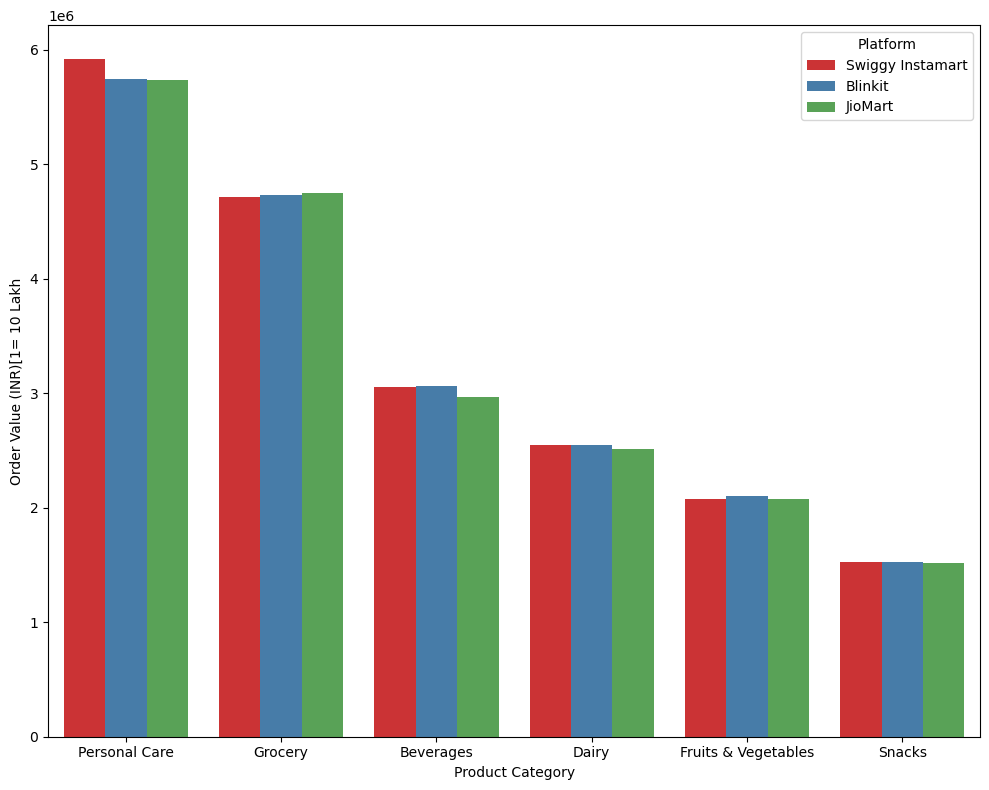

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(data = e , x = 'Product Category' , y = 'Order Value (INR)' , hue = 'Platform', palette = 'Set1')
plt.xlabel('Product Category')
plt.ylabel('Order Value (INR)[1= 10 Lakh')
plt.tight_layout()
plt.show